In [119]:
from blackbox37 import check
import string
import random

available_characters = list(string.ascii_uppercase) + [str(i) for i in range(10)]
available_characters.append("")
GROUP_ID = 2

In [120]:
print(available_characters)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '']


In [125]:
def generate():
#     size = random.randint(12, 18)
    size = 18
    individual = random.choices(available_characters, k=size)
    while len(individual) < 12:
        individual = random.choices(available_characters, k=size)
    return individual

In [126]:
sol = ''.join(generate())
print(sol)
print(check(group_number=2, attempt=sol))

SDV01S7AUHHPX4GQV
0.44975490196078427


# Population definition

In [127]:
def evaluate(x):
    x['score'] = check(GROUP_ID, x['phenotype'])
    return x

def generate_population(size):
    return [{'phenotype': generate(), 'score': None} for i in range(size)]


class RandomExploration:
    def explore(pop):
        pop.population = generate_population(len(pop.population))

        
class Population:
    def __init__(self, size, exploration=RandomExploration):
        self.population = generate_population(size)
        self.exploration = exploration
        
    def evaluate(self):
        self.population = sorted(map(evaluate, self.population), key=lambda x: x['score'], reverse=True)
        
    def evolve(self):
        self.exploration.explore(self)
    
    def __str__(self):
        return ''.join(map(lambda x: ''.join(x['phenotype']) + f" ({x['score']})\n", self.population)).strip()

### Testing Population

In [128]:
test_pop = Population(3)
test_pop.evaluate()
print(str(test_pop))

A1UZQDT1C1G5OH77UW (0.5220458553791888)
UAMBJKWR1KM4RZLQQ6 (0.4772985705003248)
T9UV7AA52ZYVSKU73 (0.3077731092436975)


# Stratégies d'exploration

In [129]:
def evolve(pop, epochs=5):
    for epoch in range(epochs):
        pop.evaluate()
        print("------------------------")
        print(f"Epoch {epoch+1}/{epochs}")
        print(str(pop))
        pop.evolve()

In [130]:
population1 = Population(5)
evolve(population1)

------------------------
Epoch 1/5
RFR9FUH9CUCI4VU4ER (0.5399029982363316)
AXCMDNY8Q3DCF2CO (0.439327485380117)
6TNPV216ZOML2JJF27 (0.4305555555555555)
S30JM6FL788KTFR270 (0.41820987654320985)
9LBHLK9QVDIIQFBV (0.4166666666666667)
------------------------
Epoch 2/5
XFJ3I4DN7TZXT4AT6 (0.5318627450980392)
9UJBOW9I1KOY1HZX6O (0.5310044893378226)
L28BH5WVOUIOPQ2L73 (0.46593915343915343)
B25KT8G0SCA4SVFZHU (0.46111782071926993)
HN7EAG2M0840VFQGWA (0.43937869028448745)
------------------------
Epoch 3/5
NFGRUXBXYJWV8KUTAP (0.5263352120236178)
AYI54VW1JQAO0FC1N5 (0.5208333333333334)
HNVCGAZ42S51VGL3M1 (0.4398148148148149)
VCJHJVIXBG344WLHSB (0.42466699155295656)
YBXRXYZ33C87QKDNZ6 (0.37411816578483253)
------------------------
Epoch 4/5
ZAC4PAV0L3S0HWMH2 (0.530343137254902)
D60HDBZVNL2GH7GCWN (0.5013057929724597)
P8O2QBKX9ZCPHZUZW (0.46946930946291565)
OEEMA3T38FVFOFEP3Y (0.44212962962962976)
Q9COWMPO3IA67T3K59 (0.4305555555555555)
------------------------
Epoch 5/5
J14NG1SGK9C11U543U (0.5012

In [ ]:
class NCharMutation:
    """
    Mutate n characters in the sequence
    """
    def __init__(n,, available_characters):
        self.available_characters = available_characters
        self.n = n
        
    def __call__(individual):
        charidx_to_mutate = random.choices(range(len(individual['genotype'])), k=self.n)
        
        for idx in charidx_to_mutate:
            individual['genotype'][idx] = random.choice(self.available_characters)
        

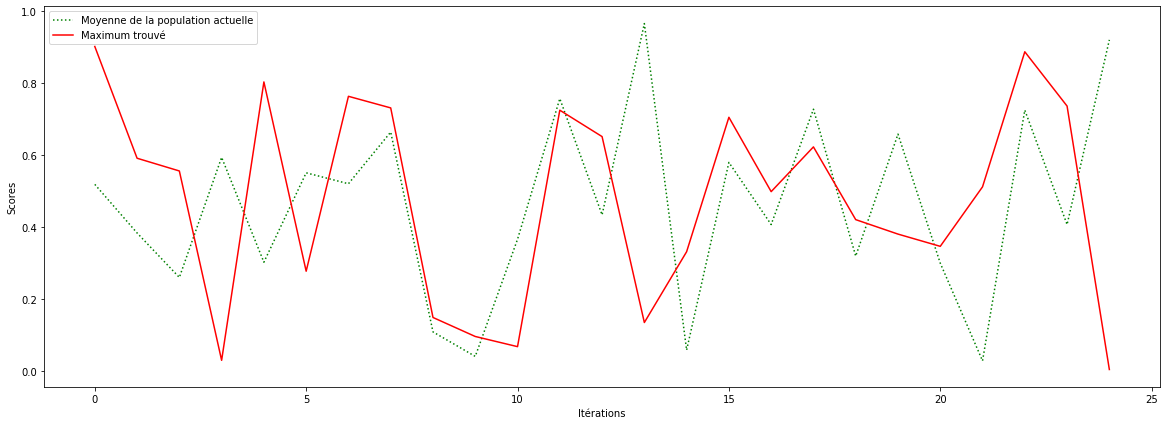

In [4]:
from random import random
from matplotlib import pyplot as plt
%matplotlib inline

rand_list1 = [random() for i in range(25)]
rand_list2 = [random() for i in range(25)]

plt.figure(figsize=(20, 7))
plt.plot(rand_list1, color='green', linestyle='dotted', label='Moyenne de la population actuelle')
plt.plot(rand_list2, color='red', label='Maximum trouvé')
plt.xlabel('Itérations')
plt.ylabel('Scores')
plt.legend(loc="upper left")
plt.show()